# Análise de Dados da Universidade Federal do Rio Grande do Norte (UFRN)

Equipe: Henrique David de Medeiros (henriquemed101@gmail.com), Lucas Gabriel Matias Paiva (lucasgmpaiva1@gmail.com) e Robert Bleda de Saint George (saintgeorge@uol.com.br)

**1.0 - Objetivo**

   O Presente trabalho tem como objetivo fazer uma análise dos dados dos alunos matriculados no curso de Bacharelado de Tecnologia da Informação - BTI da Universidade Federal do Rio Grande do Norte, no periodo de 2014.1 a 2017.1. A partir dos dados disponibilizados pela universidade, está análise pretende mostrar o comportamento do perfil socio economico dos alunos, levando-se em conta a origem de suas formações anteriores à universidade, escola pública, particular ou mista, a faixa de renda declarada. Estabelecer um comparativo destes fatores com seus desempenhos universitários.
   
   Queremos verificar se estes fatores, de alguma forma, influencia os rendimentos acadêmicos, e em caso positivo o tamanho deste impácto. Além disto pretendemos analizar a tendencia do perfil socio economico num período fortemente impactante pelos fatos políticos que tém afetado o país.


In [3]:
#Bibliotecas Necessárias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import arange

In [4]:
#Criando DataFrames de Socioeconômico

dadosSocio_2017_1 = pd.read_csv("https://bit.ly/2jLOb0T", sep=';', usecols=['id_discente', 'ano', 'periodo', 'renda', 'escola_ens_medio']);
dadosSocio_2016_2 = pd.read_csv("https://bit.ly/2K8jMF3", sep=';', usecols=['id_discente', 'ano', 'periodo', 'renda', 'escola_ens_medio']);
dadosSocio_2016_1 = pd.read_csv("https://bit.ly/2I5xrMA", sep=';', usecols=['id_discente', 'ano', 'periodo', 'renda', 'escola_ens_medio']);
dadosSocio_2015_2 = pd.read_csv("https://bit.ly/2K7UtTy", sep=';', usecols=['id_discente', 'ano', 'periodo', 'renda', 'escola_ens_medio']);
dadosSocio_2015_1 = pd.read_csv("https://bit.ly/2wuf4PY", sep=';', usecols=['id_discente', 'ano', 'periodo', 'renda', 'escola_ens_medio']);
dadosSocio_2014_2 = pd.read_csv("https://bit.ly/2IaMcO9", sep=';', usecols=['id_discente', 'ano', 'periodo', 'renda', 'escola_ens_medio']);
dadosSocio_2014_1 = pd.read_csv("https://bit.ly/2rwzbXX", sep=';', usecols=['id_discente', 'ano', 'periodo', 'renda', 'escola_ens_medio']);


In [5]:
#Criando DataFrames de Situações

dadosSituacao_2017_1 = pd.read_csv("https://bit.ly/2KMoTvS", sep=';', usecols=['discente', 'id_curso', 'media_final', 'descricao']);
dadosSituacao_2016_2 = pd.read_csv("data/matriculas-de-2016.2.csv", sep=';', usecols=['discente', 'id_curso', 'media_final', 'descricao']);
dadosSituacao_2016_1 = pd.read_csv("data/matriculas-de-2016.1.csv", sep=';', usecols=['discente', 'id_curso', 'media_final', 'descricao']);
dadosSituacao_2015_2 = pd.read_csv("data/matriculas-de-2015.2.csv", sep=';', usecols=['discente', 'id_curso', 'media_final', 'descricao']);
dadosSituacao_2015_1 = pd.read_csv("data/matriculas-de-2015.1.csv", sep=';', usecols=['discente', 'id_curso', 'media_final', 'descricao']);
dadosSituacao_2014_2 = pd.read_csv("data/matricula-componente-20142.csv", sep=';', usecols=['discente', 'id_curso', 'media_final', 'descricao']);
dadosSituacao_2014_1 = pd.read_csv("data/matricula-componente-20141.csv", sep=';', usecols=['discente', 'id_curso', 'media_final', 'descricao']);

In [6]:
#Preparando Os Dados
lista_Socio = [dadosSocio_2014_1, dadosSocio_2014_2, dadosSocio_2015_1, dadosSocio_2015_2, dadosSocio_2016_1, dadosSocio_2016_2, dadosSocio_2017_1]

for data in lista_Socio:
  data.rename(columns={"id_discente" : "discente"}, inplace=True)
  
dadosSocio_2017_1.columns

Index(['discente', 'ano', 'periodo', 'renda', 'escola_ens_medio'], dtype='object')

In [7]:
dadosSituacao_2017_1 = dadosSituacao_2017_1[dadosSituacao_2017_1.id_curso==92127264]
dadosSituacao_2016_2 = dadosSituacao_2016_2[dadosSituacao_2016_2.id_curso==92127264]
dadosSituacao_2016_1 = dadosSituacao_2016_1[dadosSituacao_2016_1.id_curso==92127264]
dadosSituacao_2015_2 = dadosSituacao_2015_2[dadosSituacao_2015_2.id_curso==92127264]
dadosSituacao_2015_1 = dadosSituacao_2015_1[dadosSituacao_2015_1.id_curso==92127264]
dadosSituacao_2014_2 = dadosSituacao_2014_2[dadosSituacao_2014_2.id_curso==92127264]
dadosSituacao_2014_1 = dadosSituacao_2014_1[dadosSituacao_2014_1.id_curso==92127264]

In [8]:
#Unindo Dados De Cada Período
dados_2017_1 = pd.merge(dadosSocio_2017_1, dadosSituacao_2017_1, on='discente')
dados_2016_2 = pd.merge(dadosSocio_2016_2, dadosSituacao_2016_2, on='discente')
dados_2016_1 = pd.merge(dadosSocio_2016_1, dadosSituacao_2016_1, on='discente')
dados_2015_2 = pd.merge(dadosSocio_2015_2, dadosSituacao_2015_2, on='discente')
dados_2015_1 = pd.merge(dadosSocio_2015_1, dadosSituacao_2015_1, on='discente')
dados_2014_2 = pd.merge(dadosSocio_2014_2, dadosSituacao_2014_2, on='discente')
dados_2014_1 = pd.merge(dadosSocio_2014_1, dadosSituacao_2014_1, on='discente')

dados_2017_1 = dados_2017_1[~dados_2017_1.discente.duplicated()]
dados_2016_2 = dados_2016_2[~dados_2016_2.discente.duplicated()]
dados_2016_1 = dados_2016_1[~dados_2016_1.discente.duplicated()]
dados_2015_2 = dados_2015_2[~dados_2015_2.discente.duplicated()]
dados_2015_1 = dados_2015_1[~dados_2015_1.discente.duplicated()]
dados_2014_2 = dados_2014_2[~dados_2014_2.discente.duplicated()]
dados_2014_1 = dados_2014_1[~dados_2014_1.discente.duplicated()]

lista_Dados = [dados_2014_1, dados_2014_2, dados_2015_1, dados_2015_2, dados_2016_1, dados_2016_2, dados_2017_1]

for data in lista_Dados:
  data.dropna()
  
dados_2017_1.reset_index(drop=True, inplace=True)
dados_2016_2.reset_index(drop=True, inplace=True)
dados_2016_1.reset_index(drop=True, inplace=True)
dados_2015_2.reset_index(drop=True, inplace=True)
dados_2015_1.reset_index(drop=True, inplace=True)
dados_2014_2.reset_index(drop=True, inplace=True)
dados_2014_1.reset_index(drop=True, inplace=True)

In [9]:
# Atribui a cada discente uma classe

dados_gerais = [dados_2014_1, dados_2014_2, dados_2015_1, dados_2015_2, dados_2016_1, dados_2016_2, dados_2017_1]

for i in dados_gerais:
    i["classe"] = pd.cut(i["renda"],
       bins=[714,1024,1541,2565,4418,8418,12926, 27500],
      labels=["D","C2","C1","B2","B1","A2", "A1"],
      include_lowest=True)
    
# Classe A1 < 27500
# Classe A2 < 12926
# Classe B1 < 8418
# Classe B2 < 4415
# Classe C1 < 2565
# Classe C2 < 1024
# Classe D < 714

In [10]:
classes = dados_2017_1.pivot_table(index = ['classe'], values=['discente'], aggfunc='count')
classes.columns = ['20171']
classes["20162"] = dados_2016_2.pivot_table(index = ['classe'], values=['discente'], aggfunc='count')
classes["20161"] = dados_2016_1.pivot_table(index = ['classe'], values=['discente'], aggfunc='count')
classes["20152"] = dados_2015_2.pivot_table(index = ['classe'], values=['discente'], aggfunc='count')
classes["20151"] = dados_2015_1.pivot_table(index = ['classe'], values=['discente'], aggfunc='count')
classes["20142"] = dados_2014_2.pivot_table(index = ['classe'], values=['discente'], aggfunc='count')
classes["20141"] = dados_2014_1.pivot_table(index = ['classe'], values=['discente'], aggfunc='count')

classes = classes.transpose()
classes

classe,D,C2,C1,B2,B1,A2,A1
20171,53,69,83,64,50,9,7
20162,44,55,75,51,37,15,1
20161,43,40,67,48,26,16,1
20152,32,28,49,28,19,11,3
20151,16,23,37,22,9,7,4
20142,19,16,28,16,13,3,0
20141,16,26,27,20,21,4,1


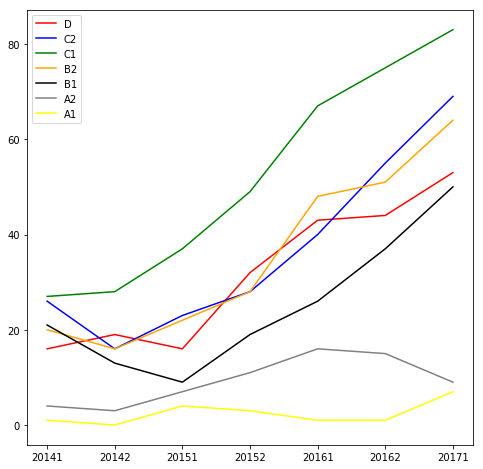

In [11]:
# Geração de gráfico mostrando a quantidade de classes sociais na UFRN com o passar dos anos.

fig = plt.figure(figsize=(8,8))
colors = ['red', 'blue', 'green', 'orange', 'black', 'grey', 'yellow']


for i in range(7):
    start_index = 0;
    end_index = 7;
    subset = classes[start_index:end_index]
    plt.plot(subset[classes.columns[i]], c=colors[i])
plt.legend(loc='upper left')

plt.show()


In [12]:
dados_2016_1.escola_ens_medio.unique()

array(['Todo em escola publica ', 'Todo em escola particular ',
       'Em escola Particular, com bolsa ',
       'Parte em escola pública parte em escola particular ',
       'Outro tipo de escola '], dtype=object)

In [30]:
todoEscolaPublica_2016_1 = dados_2016_1[dados_2016_1.escola_ens_medio == 'Todo em escola publica ']
todoEscolaPublica_2016_1 = todoEscolaPublica_2016_1[~todoEscolaPublica_2016_1.discente.duplicated()].descricao.value_counts()
todoEscolaPublica_2016_1 = todoEscolaPublica_2016_1.to_frame().reset_index()

In [31]:
todoEscolaPrivada_2016_1

,index,descricao
0,APROVADO POR NOTA,27
1,APROVADO,14
2,CANCELADO,10
3,REPROVADO,10
4,REPROVADO POR MÉDIA E POR FALTAS,5
5,EXCLUIDA,3
6,INDEFERIDO,2
7,DESISTENCIA,2
8,TRANCADO,2
9,REPROVADO POR NOTA,1


In [13]:
todoEscolaPublica_2016_1 = dados_2016_1[dados_2016_1.escola_ens_medio == 'Todo em escola publica ']
todoEscolaPublica_2016_1 = todoEscolaPublica_2016_1[~todoEscolaPublica_2016_1.discente.duplicated()].descricao.value_counts()
todoEscolaPublica_2016_1 = todoEscolaPublica_2016_1.to_frame().reset_index()

todoEscolaPublica_2016_2 = dados_2016_2[dados_2016_2.escola_ens_medio == 'Todo em escola publica ']
todoEscolaPublica_2016_2 = todoEscolaPublica_2016_2[~todoEscolaPublica_2016_2.discente.duplicated()].descricao.value_counts()
todoEscolaPublica_2016_2 = todoEscolaPublica_2016_2.to_frame().reset_index()

todoEscolaPublica_2017_1 = dados_2017_1[dados_2017_1.escola_ens_medio == 'Todo em escola publica ']
todoEscolaPublica_2017_1 = todoEscolaPublica_2017_1[~todoEscolaPublica_2017_1.discente.duplicated()].descricao.value_counts()
todoEscolaPublica_2017_1 = todoEscolaPublica_2017_1.to_frame().reset_index()

todoEscolaPublica_2015_2 = dados_2015_2[dados_2015_2.escola_ens_medio == 'Todo em escola publica ']
todoEscolaPublica_2015_2 = todoEscolaPublica_2015_2[~todoEscolaPublica_2015_2.discente.duplicated()].descricao.value_counts()
todoEscolaPublica_2015_2 = todoEscolaPublica_2015_2.to_frame().reset_index()

todoEscolaPublica_2015_1 = dados_2015_1[dados_2015_1.escola_ens_medio == 'Todo em escola publica ']
todoEscolaPublica_2015_1 = todoEscolaPublica_2015_1[~todoEscolaPublica_2015_1.discente.duplicated()].descricao.value_counts()
todoEscolaPublica_2015_1 = todoEscolaPublica_2015_1.to_frame().reset_index()

todoEscolaPublica_2014_2 = dados_2014_2[dados_2014_2.escola_ens_medio == 'Todo em escola publica ']
todoEscolaPublica_2014_2 = todoEscolaPublica_2014_2[~todoEscolaPublica_2014_2.discente.duplicated()].descricao.value_counts()
todoEscolaPublica_2014_2 = todoEscolaPublica_2014_2.to_frame().reset_index()

todoEscolaPublica_2014_1 = dados_2014_1[dados_2014_1.escola_ens_medio == 'Todo em escola publica ']
todoEscolaPublica_2014_1 = todoEscolaPublica_2014_1[~todoEscolaPublica_2014_1.discente.duplicated()].descricao.value_counts()
todoEscolaPublica_2014_1 = todoEscolaPublica_2014_1.to_frame().reset_index()

todoEscolaPrivada_2016_1 = dados_2016_1[dados_2016_1.escola_ens_medio == 'Todo em escola particular ']
todoEscolaPrivada_2016_1 = todoEscolaPrivada_2016_1[~todoEscolaPrivada_2016_1.discente.duplicated()].descricao.value_counts()
todoEscolaPrivada_2016_1 = todoEscolaPrivada_2016_1.to_frame().reset_index()

todoEscolaPrivada_2016_2 = dados_2016_2[dados_2016_2.escola_ens_medio == 'Todo em escola particular ']
todoEscolaPrivada_2016_2 = todoEscolaPrivada_2016_2[~todoEscolaPrivada_2016_2.discente.duplicated()].descricao.value_counts()
todoEscolaPrivada_2016_2 = todoEscolaPrivada_2016_2.to_frame().reset_index()

todoEscolaPrivada_2017_1 = dados_2017_1[dados_2017_1.escola_ens_medio == 'Todo em escola particular ']
todoEscolaPrivada_2017_1 = todoEscolaPrivada_2017_1[~todoEscolaPrivada_2017_1.discente.duplicated()].descricao.value_counts()
todoEscolaPrivada_2017_1 = todoEscolaPrivada_2017_1.to_frame().reset_index()

todoEscolaPrivada_2015_2 = dados_2015_2[dados_2015_2.escola_ens_medio == 'Todo em escola particular ']
todoEscolaPrivada_2015_2 = todoEscolaPrivada_2015_2[~todoEscolaPrivada_2015_2.discente.duplicated()].descricao.value_counts()
todoEscolaPrivada_2015_2 = todoEscolaPrivada_2015_2.to_frame().reset_index()

todoEscolaPrivada_2015_1 = dados_2015_1[dados_2015_1.escola_ens_medio == 'Todo em escola particular ']
todoEscolaPrivada_2015_1 = todoEscolaPrivada_2015_1[~todoEscolaPrivada_2015_1.discente.duplicated()].descricao.value_counts()
todoEscolaPrivada_2015_1 = todoEscolaPrivada_2015_1.to_frame().reset_index()

todoEscolaPrivada_2014_2 = dados_2014_2[dados_2014_2.escola_ens_medio == 'Todo em escola particular ']
todoEscolaPrivada_2014_2 = todoEscolaPrivada_2014_2[~todoEscolaPrivada_2014_2.discente.duplicated()].descricao.value_counts()
todoEscolaPrivada_2014_2 = todoEscolaPrivada_2014_2.to_frame().reset_index()

todoEscolaPrivada_2014_1 = dados_2014_1[dados_2014_1.escola_ens_medio == 'Todo em escola particular ']
todoEscolaPrivada_2014_1 = todoEscolaPrivada_2014_1[~todoEscolaPrivada_2014_1.discente.duplicated()].descricao.value_counts()
todoEscolaPrivada_2014_1 = todoEscolaPrivada_2014_1.to_frame().reset_index()

# ------------------------------- MIDDLE ----------------------------------------

middle_2016_1 = dados_2016_1[dados_2016_1.escola_ens_medio == 'Todo em escola particular ']
middle_2016_1 = middle_2016_1[~middle_2016_1.discente.duplicated()].descricao.value_counts()
middle_2016_1 = middle_2016_1.to_frame().reset_index()

middle_2016_2 = dados_2016_2[dados_2016_2.escola_ens_medio == 'Todo em escola particular ']
middle_2016_2 = middle_2016_2[~middle_2016_2.discente.duplicated()].descricao.value_counts()
middle_2016_2 = middle_2016_2.to_frame().reset_index()

middle_2017_1 = dados_2017_1[dados_2017_1.escola_ens_medio == 'Todo em escola particular ']
middle_2017_1 = middle_2017_1[~middle_2017_1.discente.duplicated()].descricao.value_counts()
middle_2017_1 = middle_2017_1.to_frame().reset_index()

middle_2015_2 = dados_2015_2[dados_2015_2.escola_ens_medio == 'Todo em escola particular ']
middle_2015_2 = middle_2015_2[~middle_2015_2.discente.duplicated()].descricao.value_counts()
middle_2015_2 = middle_2015_2.to_frame().reset_index()

middle_2015_1 = dados_2015_1[dados_2015_1.escola_ens_medio == 'Todo em escola particular ']
middle_2015_1 = middle_2015_1[~middle_2015_1.discente.duplicated()].descricao.value_counts()
middle_2015_1 = middle_2015_1.to_frame().reset_index()

middle_2014_2 = dados_2014_2[dados_2014_2.escola_ens_medio == 'Todo em escola particular ']
middle_2014_2 = middle_2014_2[~middle_2014_2.discente.duplicated()].descricao.value_counts()
middle_2014_2 = middle_2014_2.to_frame().reset_index()

middle_2014_1 = dados_2014_1[dados_2014_1.escola_ens_medio == 'Todo em escola particular ']
middle_2014_1 = middle_2014_1[~middle_2014_1.discente.duplicated()].descricao.value_counts()
middle_2014_1 = middle_2014_1.to_frame().reset_index()

#--------------------------------- Particular, com Bolsa ---------------------------------------


bolsa_2016_1 = dados_2016_1[dados_2016_1.escola_ens_medio == 'Em escola Particular, com bolsa ']
bolsa_2016_1 = bolsa_2016_1[~bolsa_2016_1.discente.duplicated()].descricao.value_counts()
bolsa_2016_1 = bolsa_2016_1.to_frame().reset_index()

bolsa_2016_2 = dados_2016_2[dados_2016_2.escola_ens_medio == 'Em escola Particular, com bolsa ']
bolsa_2016_2 = bolsa_2016_2[~bolsa_2016_2.discente.duplicated()].descricao.value_counts()
bolsa_2016_2 = bolsa_2016_2.to_frame().reset_index()

bolsa_2017_1 = dados_2017_1[dados_2017_1.escola_ens_medio == 'Em escola Particular, com bolsa ']
bolsa_2017_1 = bolsa_2017_1[~bolsa_2017_1.discente.duplicated()].descricao.value_counts()
bolsa_2017_1 = bolsa_2017_1.to_frame().reset_index()

bolsa_2015_2 = dados_2015_2[dados_2015_2.escola_ens_medio == 'Em escola Particular, com bolsa ']
bolsa_2015_2 = bolsa_2015_2[~bolsa_2015_2.discente.duplicated()].descricao.value_counts()
bolsa_2015_2 = bolsa_2015_2.to_frame().reset_index()

bolsa_2015_1 = dados_2015_1[dados_2015_1.escola_ens_medio == 'Em escola Particular, com bolsa ']
bolsa_2015_1 = bolsa_2015_1[~bolsa_2015_1.discente.duplicated()].descricao.value_counts()
bolsa_2015_1 = bolsa_2015_1.to_frame().reset_index()

bolsa_2014_2 = dados_2014_2[dados_2014_2.escola_ens_medio == 'Em escola Particular, com bolsa ']
bolsa_2014_2 = bolsa_2014_2[~bolsa_2014_2.discente.duplicated()].descricao.value_counts()
bolsa_2014_2 = bolsa_2014_2.to_frame().reset_index()

bolsa_2014_1 = dados_2014_1[dados_2014_1.escola_ens_medio == 'Em escola Particular, com bolsa ']
bolsa_2014_1 = bolsa_2014_1[~bolsa_2014_1.discente.duplicated()].descricao.value_counts()
bolsa_2014_1 = bolsa_2014_1.to_frame().reset_index()

#------------------------------------ OUTRAS ESCOLAS ----------------------------------------

other_2016_1 = dados_2016_1[dados_2016_1.escola_ens_medio == 'Outro tipo de escola ']
other_2016_1 = other_2016_1[~other_2016_1.discente.duplicated()].descricao.value_counts()
other_2016_1 = other_2016_1.to_frame().reset_index()

other_2016_2 = dados_2016_2[dados_2016_2.escola_ens_medio == 'Outro tipo de escola ']
other_2016_2 = other_2016_2[~other_2016_2.discente.duplicated()].descricao.value_counts()
other_2016_2 = other_2016_2.to_frame().reset_index()

other_2017_1 = dados_2017_1[dados_2017_1.escola_ens_medio == 'Outro tipo de escola ']
other_2017_1 = other_2017_1[~other_2017_1.discente.duplicated()].descricao.value_counts()
other_2017_1 = other_2017_1.to_frame().reset_index()

other_2015_2 = dados_2015_2[dados_2015_2.escola_ens_medio == 'Outro tipo de escola ']
other_2015_2 = other_2015_2[~other_2015_2.discente.duplicated()].descricao.value_counts()
other_2015_2 = other_2015_2.to_frame().reset_index()

other_2015_1 = dados_2015_1[dados_2015_1.escola_ens_medio == 'Outro tipo de escola ']
other_2015_1 = other_2015_1[~other_2015_1.discente.duplicated()].descricao.value_counts()
other_2015_1 = other_2015_1.to_frame().reset_index()

other_2014_2 = dados_2014_2[dados_2014_2.escola_ens_medio == 'Outro tipo de escola ']
other_2014_2 = other_2014_2[~other_2014_2.discente.duplicated()].descricao.value_counts()
other_2014_2 = other_2014_2.to_frame().reset_index()

other_2014_1 = dados_2014_1[dados_2014_1.escola_ens_medio == 'Outro tipo de escola ']
other_2014_1 = other_2014_1[~other_2014_1.discente.duplicated()].descricao.value_counts()
other_2014_1 = other_2014_1.to_frame().reset_index()

In [22]:
all_public_school =  pd.merge(todoEscolaPublica_2014_1, todoEscolaPublica_2014_2, on='index')
all_public_school.columns = ['index', '2014_1', '2014_2']
all_public_school = pd.merge(all_public_school, todoEscolaPublica_2015_1, on='index')
all_public_school = pd.merge(all_public_school, todoEscolaPublica_2015_2, on='index')
all_public_school = pd.merge(all_public_school, todoEscolaPublica_2016_1, on='index')
all_public_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1']
all_public_school = pd.merge(all_public_school, todoEscolaPublica_2016_2, on='index')
all_public_school = pd.merge(all_public_school, todoEscolaPublica_2017_1, on='index')
all_public_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1', '2016_2', '2017_1']

all_private_school =  pd.merge(todoEscolaPrivada_2014_1, todoEscolaPrivada_2014_2, on='index')
all_private_school.columns = ['index', '2014_1', '2014_2']
all_private_school = pd.merge(all_private_school, todoEscolaPrivada_2015_1, on='index')
all_private_school = pd.merge(all_private_school, todoEscolaPrivada_2015_2, on='index')
all_private_school = pd.merge(all_private_school, todoEscolaPrivada_2016_1, on='index')
all_private_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1']
all_private_school = pd.merge(all_private_school, todoEscolaPrivada_2016_2, on='index')
all_private_school = pd.merge(all_private_school, todoEscolaPrivada_2017_1, on='index')
all_private_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1', '2016_2', '2017_1']

middle_school =  pd.merge(middle_2014_1, middle_2014_2, on='index')
middle_school.columns = ['index', '2014_1', '2014_2']
middle_school = pd.merge(middle_school, middle_2015_1, on='index')
middle_school = pd.merge(middle_school, middle_2015_2, on='index')
middle_school = pd.merge(middle_school, middle_2016_1, on='index')
middle_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1']
middle_school = pd.merge(middle_school, middle_2016_2, on='index')
middle_school = pd.merge(middle_school, middle_2017_1, on='index')
middle_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1', '2016_2', '2017_1']

bolsa_school =  pd.merge(bolsa_2014_1, bolsa_2014_2, on='index')
bolsa_school.columns = ['index', '2014_1', '2014_2']
bolsa_school = pd.merge(bolsa_school, bolsa_2015_1, on='index')
bolsa_school = pd.merge(bolsa_school, bolsa_2015_2, on='index')
bolsa_school = pd.merge(bolsa_school, bolsa_2016_1, on='index')
bolsa_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1']
bolsa_school = pd.merge(bolsa_school, bolsa_2016_2, on='index')
bolsa_school = pd.merge(bolsa_school, bolsa_2017_1, on='index')
bolsa_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1', '2016_2', '2017_1']

 
other_school =  pd.merge(other_2014_1, other_2014_2, on='index')
other_school.columns = ['index', '2014_1', '2014_2']
other_school = pd.merge(other_school, other_2015_1, on='index')
other_school = pd.merge(other_school, other_2015_2, on='index')
other_school = pd.merge(other_school, other_2016_1, on='index')
other_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1']
other_school = pd.merge(other_school, other_2016_2, on='index')
other_school = pd.merge(other_school, other_2017_1, on='index')
other_school.columns = ['index', '2014_1', '2014_2', '2015_1', '2015_2', '2016_1', '2016_2', '2017_1']

In [23]:
all_public_school = all_public_school.T
all_public_school.reset_index()
all_public_school.drop(all_public_school.index[0], inplace=True)
all_public_school.columns = ['APROVADO', 'APROVADO POR NOTA', 'TRANCADO', 'CANCELADO', 'INDEFERIDO', 'REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS']
all_public_school = all_public_school.reset_index()

In [24]:
all_private_school = all_private_school.T
all_private_school.reset_index()
all_private_school.drop(all_private_school.index[0], inplace=True)
all_private_school.columns = ['APROVADO', 'APROVADO POR NOTA', 'TRANCADO', 'REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS']
all_private_school = all_private_school.reset_index()

In [25]:
middle_school = middle_school.T
middle_school.reset_index()
middle_school.drop(middle_school.index[0], inplace=True)
middle_school.columns = ['APROVADO', 'APROVADO POR NOTA', 'TRANCADO', 'REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS']
middle_school = middle_school.reset_index()

In [26]:
bolsa_school = bolsa_school.T
bolsa_school.reset_index()
bolsa_school.drop(bolsa_school.index[0], inplace=True)
bolsa_school.columns = ['APROVADO', 'APROVADO POR NOTA']
bolsa_school = bolsa_school.reset_index()

In [27]:
dados_2016_1.pivot_table(index = ['escola_ens_medio', 'descricao'], values=['discente'], aggfunc='count')

discente
escola_ens_medio                                   descricao                                 
Em escola Particular, com bolsa                    APROVADO                                 2
                                                   APROVADO POR NOTA                        7
                                                   INDEFERIDO                               2
                                                   REPROVADO                                1
                                                   REPROVADO POR MÉDIA E POR FALTAS         2
                                                   TRANCADO                                 1
Outro tipo de escola                               CANCELADO                                1
                                                   REPROVADO                                1
Parte em escola pública parte em escola particu... APROVADO                                 2
                                                   APROVADO POR NOTA                        3
                                                   CANCELADO                                1
                                                   INDEFERIDO                               1
                                                   REPROVADO                                1
Todo em escola particular                          APROVADO                                14
                                                   APROVADO POR NOTA                       27
                                                   CANCELADO                               10
                                                   DESISTENCIA                              2
                                                   EXCLUIDA                                 3
                                                   INDEFERIDO                               2
                                                   REPROVADO                               10
                                                   REPROVADO POR MÉDIA E POR FALTAS         5
                                                   REPROVADO POR NOTA                       1
                                                   TRANCADO                                 2
Todo em escola publica                             APROVADO                                36
                                                   APROVADO POR NOTA                       43
                                                   CANCELADO                               15
                                                   DESISTENCIA                              3
                                                   EXCLUIDA                                 6
                                                   INDEFERIDO                               7
                                                   REPROVADO                               29
                                                   REPROVADO POR MÉDIA E POR FALTAS        12
                                                   REPROVADO POR NOTA                       1
                                                   TRANCADO                                 4

C:\Users\Henrique\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0.5,0.98,'Situação dos Alunos do IMD')

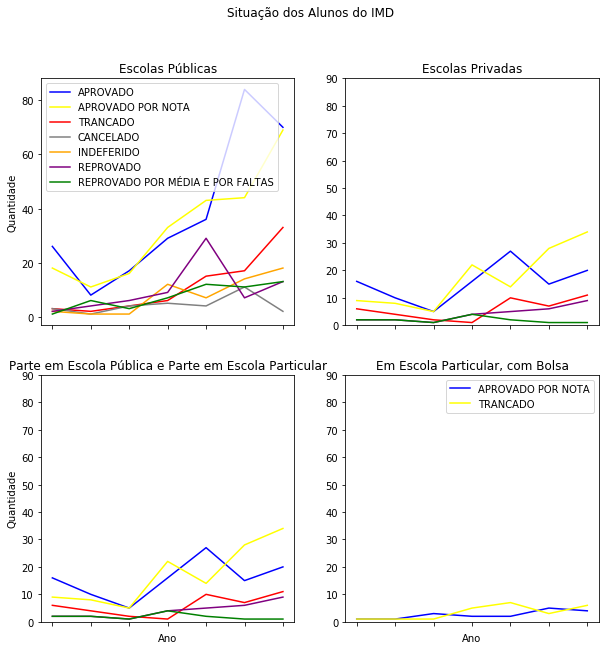

In [29]:
fig_situacao, axies = plt.subplots( ncols=2, nrows=2, figsize=(10,10))

ax = all_public_school.plot( kind='line', x ='index', y = ['APROVADO', 'APROVADO POR NOTA', 'TRANCADO','CANCELADO','INDEFERIDO','REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS' ], 
              color=['blue', 'yellow', 'red','grey', 'orange', 'purple', 'green'], 
              title='Escolas Públicas', ax = axies[0,0])

ax.set_xlabel("")
ax.set_ylabel("Quantidade")


ax = all_private_school.plot( kind='line', x ='index', y = ['APROVADO', 'APROVADO POR NOTA', 'TRANCADO', 'REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS' ], 
              color=['blue', 'yellow', 'red', 'purple', 'green'], 
              title='Escolas Privadas', ax = axies[0,1], legend= False)

ax.set_xlabel("")
ax.set_ylim([0, 90])

ax = middle_school.plot( kind='line', x ='index', y = ['APROVADO', 'APROVADO POR NOTA', 'TRANCADO', 'REPROVADO', 'REPROVADO POR MÉDIA E POR FALTAS' ], 
              color=['blue', 'yellow', 'red', 'purple', 'green'], 
              title='Parte em Escola Pública e Parte em Escola Particular', ax = axies[1,0], legend= False)

ax.set_xlabel("Ano")
ax.set_ylabel("Quantidade")
ax.set_ylim([0, 90])

ax = bolsa_school.plot( kind='line', x ='index', y = ['APROVADO', 'APROVADO POR NOTA' ], 
              color=['blue', 'yellow'], 
              title='Em Escola Particular, com Bolsa', ax = axies[1,1], legend= False)

ax.set_xlabel("Ano")
ax.set_ylabel("")
ax.set_ylim([0, 90])

fig_situacao.suptitle("Situação dos Alunos do IMD")